# New Forcings

We start with our original goal: forcing with Makkink potential evaporation:

In [ ]:
from ewatercycle._forcings.makkink import LumpedMakkinkForcing

cmip_dataset = {
    "dataset": "EC-Earth3",
    "project": "CMIP6",
    "grid": "gr",
    "exp": "historical",
    "ensemble": "r6i1p1f1",
}
shape = "./src/ewatercycle/testing/data/Rhine/Rhine.shp"

forcing = LumpedMakkinkForcing.generate(
    start_time="2000-01-01T00:00:00Z",
    end_time="2001-01-01T00:00:00Z",
    dataset=cmip_dataset,
    shape=shape,
)

The forcing object now has a filenames attribute which stores the filename of the different variables:

In [2]:
from rich import print
print(forcing)

LumpedMakkinkForcing(
    start_time='2000-01-01T00:00:00Z',
    end_time='2001-01-01T00:00:00Z',
    directory=PosixPath('/home/bart/esmvaltool_output/ewcrep_fto8exe_20240223_145956/work/diagnostic/script'),
    shape=PosixPath('/home/bart/esmvaltool_output/ewcrep_fto8exe_20240223_145956/work/diagnostic/script/src/ewaterc
ycle/testing/data/Rhine/Rhine.shp'),
    filenames={
        'pr': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_pr_gr_2000-2001.nc',
        'tas': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_tas_gr_2000-2001.nc',
        'rsds': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_rsds_gr_2000-2001.nc',
        'evspsblpot': 'evspsblpot.nc'
    }
)

We can also easily list and access the variables:

In [3]:
forcing.keys()

('pr', 'tas', 'rsds', 'evspsblpot')

In [4]:
forcing["pr"]

<xarray.DataArray 'pr' (time: 731)>
[731 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2001-12-31T12:00:00
    lat      float64 ...
    lon      float64 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    cell_methods:   area: time: mean longitude: latitude: mean

As a demonstration, we can compare the evaporation and precipitation:

Text(0, 0.5, 'Flux (kg m-2 s-1)')

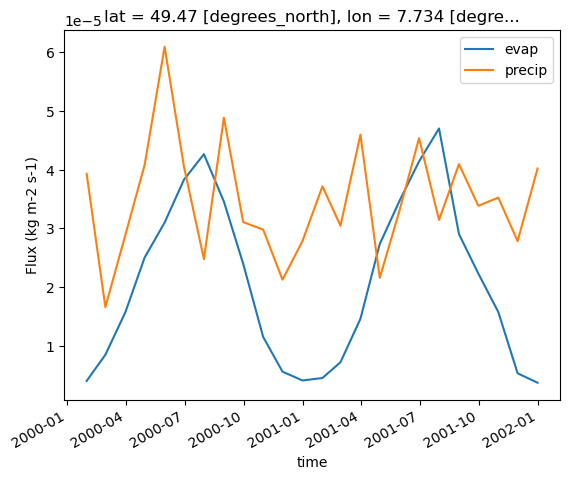

In [ ]:
import matplotlib.pyplot as plt
forcing["evspsblpot"].resample(time="1M").mean().plot(label="evap")
forcing["pr"].resample(time="1M").mean().plot(label="precip")
plt.legend()
plt.ylabel("Flux (kg m-2 s-1)")

# Generic forcing

The generic forcing still works the same, except potential evaporation has been removed (as it's not in any cmip6 model...).

The direct accessors (e.g. `.pr`) have been removed. However, AFAIK no one/no plugin was using the generic forcing except LeakyBucket. 

In [ ]:
from ewatercycle.base.forcing import GenericDistributedForcing

forcing = GenericDistributedForcing.generate(
    start_time="2000-01-01T00:00:00Z",
    end_time="2001-01-01T00:00:00Z",
    dataset=cmip_dataset,
    shape=shape,
)

In [5]:
print(forcing)

GenericDistributedForcing(
    start_time='2000-01-01T00:00:00Z',
    end_time='2001-01-01T00:00:00Z',
    directory=PosixPath('/home/bart/esmvaltool_output/ewcrepa0mytzew_20240223_150641/work/diagnostic/script'),
    shape=PosixPath('/home/bart/esmvaltool_output/ewcrepa0mytzew_20240223_150641/work/diagnostic/script/src/ewaterc
ycle/testing/data/Rhine/Rhine.shp'),
    filenames={
        'pr': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_pr_gr_2000-2001.nc',
        'tas': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_tas_gr_2000-2001.nc'
    }
)

# UserForcing

To make it easier for e.g. students and model developers to generate forcing, a more flexible "UserForcing" is now available.

With UserForcing, the variables and postprocessor are defined upon calling `.generate()`:

In [ ]:
from ewatercycle.base.forcing import DistributedUserForcing, LumpedUserForcing
from ewatercycle._forcings.makkink import derive_e_pot

forcing = DistributedUserForcing.generate(
    start_time="2000-01-01T00:00:00Z",
    end_time="2001-01-01T00:00:00Z",
    dataset=cmip_dataset,
    shape=shape,
    variables=("pr", "tas", "rsds",),
    postprocessor=derive_e_pot,
)

lumped_forcing = LumpedUserForcing.generate(
    start_time="2000-01-01T00:00:00Z",
    end_time="2001-01-01T00:00:00Z",
    dataset=cmip_dataset,
    shape=shape,
    variables=("pr", "tas", "rsds",),
    derived_variables=("evspsblpot",),
    postprocessor=derive_e_pot,
)

In [8]:
print(lumped_forcing)

LumpedUserForcing(
    start_time='2000-01-01T00:00:00Z',
    end_time='2001-01-01T00:00:00Z',
    directory=PosixPath('/home/bart/esmvaltool_output/ewcrepms6t1ek7_20240223_150957/work/diagnostic/script'),
    shape=PosixPath('/home/bart/esmvaltool_output/ewcrepms6t1ek7_20240223_150957/work/diagnostic/script/src/ewaterc
ycle/testing/data/Rhine/Rhine.shp'),
    filenames={
        'pr': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_pr_gr_2000-2001.nc',
        'tas': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_tas_gr_2000-2001.nc',
        'rsds': 'CMIP6_EC-Earth3_day_historical_r6i1p1f1_rsds_gr_2000-2001.nc',
        'evspsblpot': 'evspsblpot.nc'
    }
)